<a href="https://colab.research.google.com/github/Rengadurai08/Sales-Prediction-Using-Python/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Important Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Importing Dataset

In [33]:
df = pd.read_csv('/content/drive/MyDrive/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [34]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [35]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [36]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [37]:
df.shape

(200, 4)

<Axes: xlabel='TV', ylabel='Sales'>

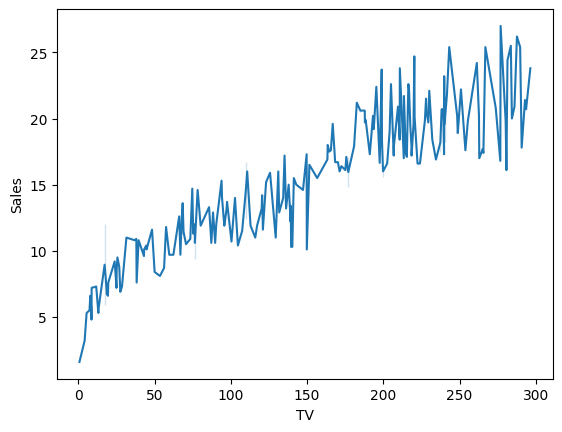

In [38]:
sns.lineplot(x=df['TV'],y=df['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

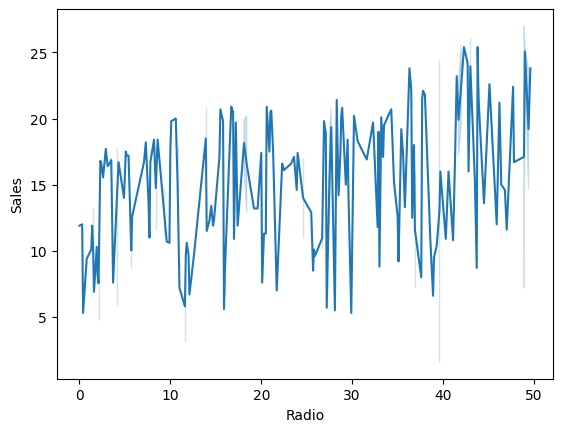

In [39]:
sns.lineplot(x=df['Radio'],y=df['Sales'])

<Axes: xlabel='Newspaper', ylabel='Sales'>

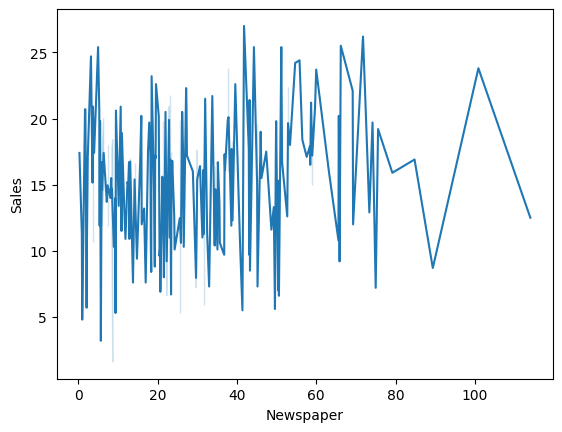

In [65]:
sns.lineplot(x=df['Newspaper'],y=df['Sales'])

Plot Observation

---

As advertising costs for TV ads increase, sales tend to rise correspondingly. In contrast, the relationship between advertising costs and sales for newspapers and radio is less predictable.


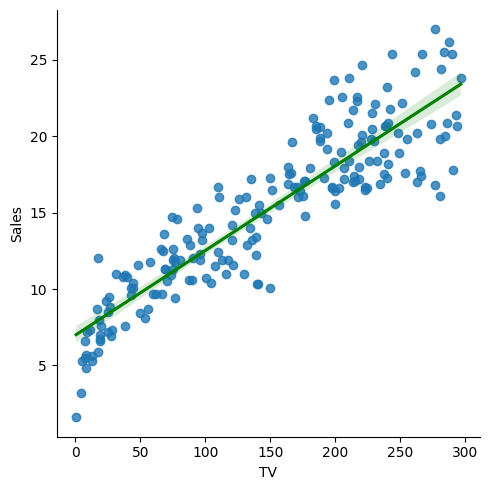

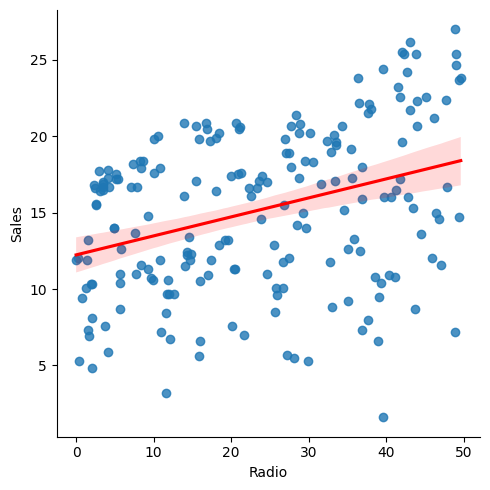

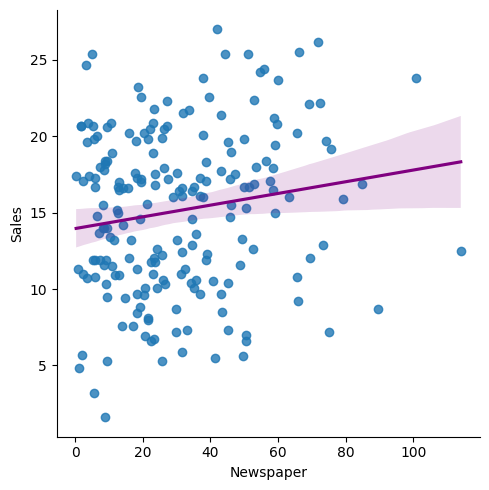

In [41]:
sns.lmplot(x="TV", y="Sales", data=df, line_kws={'color': 'green'})
sns.lmplot(x="Radio", y="Sales", data=df, line_kws={'color': 'red'})
sns.lmplot(x="Newspaper", y="Sales", data=df, line_kws={'color': 'purple'})

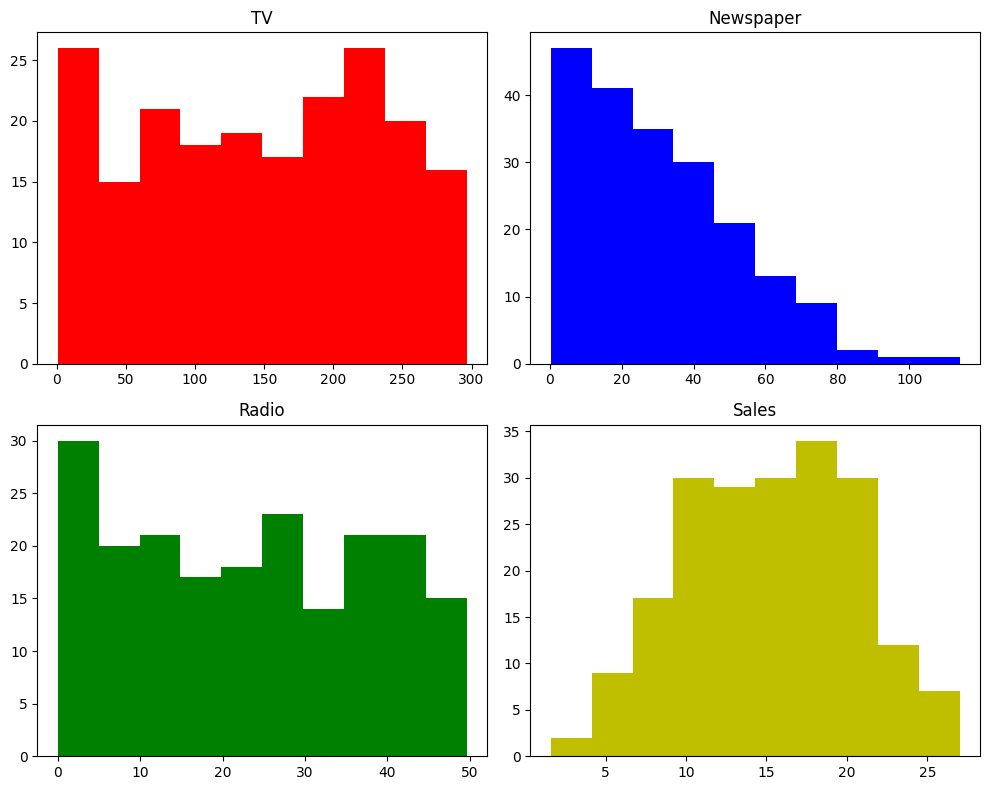

In [66]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.hist(df['TV'], color='r')
plt.title('TV')

plt.subplot(2,2,2)
plt.hist(df['Newspaper'], color='b')
plt.title('Newspaper')

plt.subplot(2,2,3)
plt.hist(df['Radio'], color='g')
plt.title('Radio')

plt.subplot(2,2,4)
plt.hist(df['Sales'], color='y')
plt.title('Sales')

plt.tight_layout()
plt.show()

Histogram Observation

---

The majority sales is the result of low advertising cost in newspaper

<Axes: >

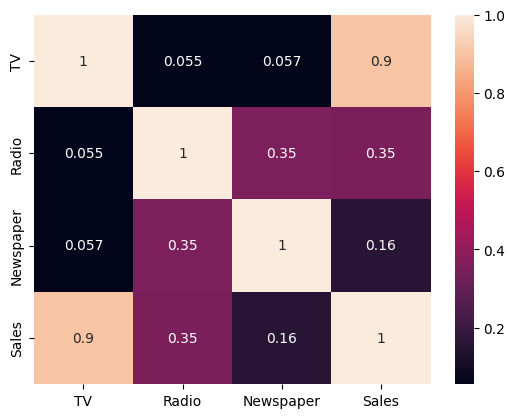

In [68]:
sns.heatmap(df.corr(), annot=True)

The TV and sales are closely linked

Since linear regression is related to only one variable, TV, let's use it to train our model

In [83]:
x = df[['TV']]
y = df[['Sales']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [84]:
print(x_train)

        TV
74   213.4
3    151.5
185  205.0
26   142.9
90   134.3
..     ...
87   110.7
103  187.9
67   139.3
24    62.3
8      8.6

[140 rows x 1 columns]


In [85]:
print(y_train)

     Sales
74    17.0
3     16.5
185   22.6
26    15.0
90    14.0
..     ...
87    16.0
103   19.7
67    13.4
24     9.7
8      4.8

[140 rows x 1 columns]


Here we are using Linear Regression

In [86]:
print(x_test)

        TV
126    7.8
104  238.2
99   135.2
92   217.7
111  241.7
167  206.8
116  139.2
96   197.6
52   216.4
69   216.8
164  117.2
124  229.5
182   56.2
154  187.8
125   87.2
196   94.2
194  149.7
177  170.2
163  163.5
31   112.9
11   214.7
73   129.4
15   195.4
41   177.0
97   184.9
128  220.3
133  219.8
82    75.3
139  184.9
123  123.1
83    68.4
65    69.0
151  121.0
162  188.4
170   50.0
77   120.5
32    97.2
173  168.4
174  222.4
85   193.2
168  215.4
112  175.7
171  164.5
181  218.5
7    120.2
46    89.7
75    16.9
28   248.8
29    70.6
195   38.2
40   202.5
153  171.3
115   75.1
64   131.1
59   210.7
1     44.5
192   17.2
136   25.6
152  197.6
161   85.7


In [87]:
print(y_test)

     Sales
126    6.6
104   20.7
99    17.2
92    19.4
111   21.8
167   17.2
116   12.2
96    16.7
52    22.6
69    22.3
164   11.9
124   19.7
182    8.7
154   20.6
125   10.6
196   14.0
194   17.3
177   16.7
163   18.0
31    11.9
11    17.4
73    11.0
15    22.4
41    17.1
97    20.5
128   24.7
133   19.6
82    11.3
139   20.7
123   15.2
83    13.6
65    11.3
151   11.6
162   19.9
170    8.4
77    14.2
32    13.2
173   16.7
174   16.5
85    20.2
168   17.1
112   17.1
171   17.5
181   17.2
7     13.2
46    10.6
75     8.7
28    18.9
29    10.5
195    7.6
40    16.6
153   16.0
115   12.6
64    16.0
59    18.4
1     10.4
192    5.9
136    9.5
152   16.6
161   13.3


In [88]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [113]:
x_train_predication = linreg.predict(x_train)
print(x_train_predication)

[[18.58874687]
 [15.21236477]
 [18.13056255]
 [14.74327129]
 [14.27417782]
 [11.32325258]
 [20.02875475]
 [11.76507318]
 [ 8.00687081]
 [19.26511421]
 [14.37781475]
 [ 8.3177816 ]
 [ 9.02142181]
 [16.35782558]
 [12.93780687]
 [20.04511848]
 [19.60875245]
 [10.55415747]
 [18.86147564]
 [19.73966226]
 [ 8.24687212]
 [10.64688525]
 [23.11604436]
 [14.65599809]
 [16.49964454]
 [18.97602172]
 [11.11597872]
 [20.79239529]
 [17.37237658]
 [22.63604174]
 [12.42507679]
 [19.38511486]
 [13.80508434]
 [11.02325094]
 [10.08506399]
 [21.27785249]
 [21.28876164]
 [19.89784494]
 [19.34147826]
 [17.84692463]
 [19.40147859]
 [22.80513357]
 [22.05240218]
 [17.84692463]
 [20.00148187]
 [10.95234146]
 [22.45604075]
 [14.9832726 ]
 [19.16693185]
 [17.79783345]
 [22.04149303]
 [ 7.66868714]
 [ 7.58686851]
 [22.23240317]
 [ 9.10324044]
 [21.43603517]
 [ 8.44869141]
 [22.25967604]
 [11.21416108]
 [15.85600465]
 [18.59420145]
 [22.96331626]
 [ 7.96868878]
 [11.06688755]
 [16.04691479]
 [ 9.38687836]
 [12.93780

In [114]:
print(y_train)

     Sales
74    17.0
3     16.5
185   22.6
26    15.0
90    14.0
..     ...
87    16.0
103   19.7
67    13.4
24     9.7
8      4.8

[140 rows x 1 columns]


In [115]:
print(linreg.coef_)
print(linreg.intercept_)

[[0.05454575]]
[6.9486832]


In [116]:
x_test_predication = linreg.predict(x_test)
print(x_test_predication)

[[ 7.37414007]
 [19.94148154]
 [14.32326899]
 [18.82329361]
 [20.13239168]
 [18.2287449 ]
 [14.54145201]
 [17.72692398]
 [18.75238413]
 [18.77420243]
 [13.34144544]
 [19.46693349]
 [10.01415451]
 [17.1923756 ]
 [11.70507285]
 [12.08689312]
 [15.11418241]
 [16.23237035]
 [15.8669138 ]
 [13.1068987 ]
 [18.65965635]
 [14.00690363]
 [17.60692332]
 [16.60328147]
 [17.03419291]
 [18.96511257]
 [18.93783969]
 [11.05597839]
 [17.03419291]
 [13.66326538]
 [10.6796127 ]
 [10.71234015]
 [13.5487193 ]
 [17.22510305]
 [ 9.67597085]
 [13.52144643]
 [12.25053038]
 [16.13418799]
 [19.07965865]
 [17.48692266]
 [18.69783838]
 [16.53237199]
 [15.92145955]
 [18.86693021]
 [13.5050827 ]
 [11.84143724]
 [ 7.87050642]
 [20.51966653]
 [10.79961336]
 [ 9.03233096]
 [17.99419817]
 [16.29237067]
 [11.04506924]
 [14.09963141]
 [18.44147334]
 [ 9.3759692 ]
 [ 7.88687015]
 [ 8.34505447]
 [17.72692398]
 [11.62325422]]


In [117]:
print(y_test)

     Sales
126    6.6
104   20.7
99    17.2
92    19.4
111   21.8
167   17.2
116   12.2
96    16.7
52    22.6
69    22.3
164   11.9
124   19.7
182    8.7
154   20.6
125   10.6
196   14.0
194   17.3
177   16.7
163   18.0
31    11.9
11    17.4
73    11.0
15    22.4
41    17.1
97    20.5
128   24.7
133   19.6
82    11.3
139   20.7
123   15.2
83    13.6
65    11.3
151   11.6
162   19.9
170    8.4
77    14.2
32    13.2
173   16.7
174   16.5
85    20.2
168   17.1
112   17.1
171   17.5
181   17.2
7     13.2
46    10.6
75     8.7
28    18.9
29    10.5
195    7.6
40    16.6
153   16.0
115   12.6
64    16.0
59    18.4
1     10.4
192    5.9
136    9.5
152   16.6
161   13.3


Text(0.5, 1.0, 'Actual vs Predicted Values')

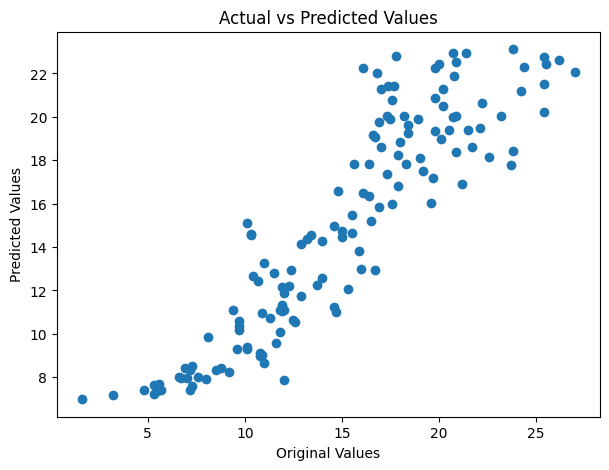

In [121]:
x_train_prediction = linreg.predict(x_train)
plt.figure(figsize=(7,5))
plt.scatter(y_train, x_train_prediction)
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

Text(0.5, 1.0, 'Actual vs Predicted Values')

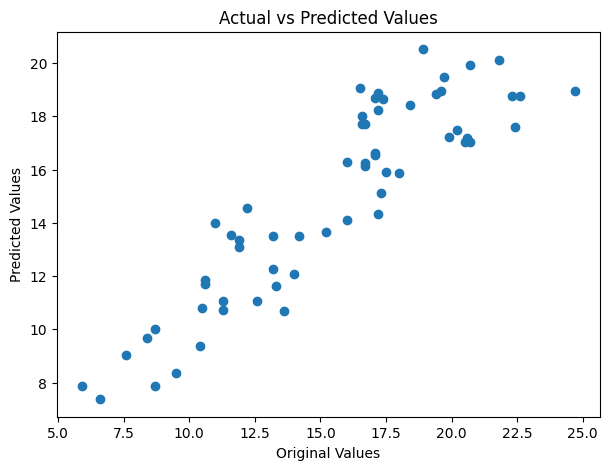

In [122]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, x_test_predication)
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")